In [35]:
import numpy as np
import pandas as pd
from scipy import * 
from scipy.linalg import norm, pinv
from matplotlib import pyplot as plt  
import warnings
warnings.filterwarnings("ignore")

# load feature data

In [36]:
Feature_A = pd.read_excel(io=r'C:\Users\Serendipity\Attention_RBF\Feature_A.xlsx')
Feature_B = pd.read_excel(io=r'C:\Users\Serendipity\Attention_RBF\Feature_B.xlsx')
Feature_C = pd.read_excel(io=r'C:\Users\Serendipity\Attention_RBF\Feature_c.xlsx')

In [37]:
Feature_A = Feature_A.rename(columns={"Isa_A": "Isa", "Isd_A": "Isd","Iar_A": "Iar","Pvd_A": "Pvd"})
Feature_B = Feature_B.rename(columns={"Isa_B": "Isa", "Isd_B": "Isd","Iar_B": "Iar","Pvd_B": "Pvd"})
Feature_C = Feature_C.rename(columns={"Isa_C": "Isa", "Isd_C": "Isd","Iar_C": "Iar","Pvd_C": "Pvd"})

In [38]:
Feature = pd.concat([
    Feature_A,
    Feature_B,
    Feature_C,
]) 

In [39]:
label_y = Feature['label']
X_feat =  Feature[['负载率','Isa','三相电流不平衡度','Isd','Iar','Pvd','负载率差值']]
# float64->float32
#X_feat[X_feat.select_dtypes(np.float64).columns] = X_feat.select_dtypes(np.float64).astype(np.float32)

In [40]:
# inf,nan数据填充
X_feat = (X_feat.replace([np.inf, -np.inf], np.nan)).fillna(value = 0) 

# SMOTE样本均衡化

In [41]:
from collections import Counter
# 查看所生成的样本类别分布，0和1样本比例9比1，属于类别不平衡数据
print(Counter(label_y))
# Counter({0: 900, 1: 100})

Counter({0: 54262, 1: 383})


In [42]:
# 使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_resample(X_feat, label_y)

# CART决策树

In [43]:
X_smo

,负载率,Isa,三相电流不平衡度,Isd,Iar,Pvd,负载率差值
0,29.500100,11.176551,0.027778,11.971831,0.142000,0.000270,-2.784500
1,26.715600,-3.287221,0.076336,-4.000000,0.125000,0.000100,0.292500
2,27.008100,9.861663,0.053030,11.538462,0.130000,0.000150,-0.713900
3,26.294200,-5.916998,0.106218,-7.826087,0.115000,0.000090,0.819200
4,27.113400,5.916998,0.088161,7.258065,0.124000,0.000130,-1.310300
...,...,...,...,...,...,...,...
108519,9.913868,-16.018060,0.356146,-30.104010,0.041803,0.000421,0.542976
108520,8.752847,-8.364227,0.181084,-13.798825,0.060519,0.000228,0.845536
108521,8.431163,-16.104812,0.363324,-26.084708,0.052558,0.000261,1.401108
108522,19.248832,-2.521282,0.085149,-4.353015,0.088742,0.000265,-1.394762


In [51]:
from sklearn import datasets,model_selection,metrics,tree,preprocessing
#x=preprocessing.StandardScaler().fit_transform(x)
# 划分训练集、测试集
x_train,x_test,y_train,y_test=model_selection.train_test_split(X_smo,y_smo,test_size=0.3)
# 导入决策树
model1=tree.DecisionTreeClassifier(max_depth=25)
# 模型训练
model1.fit(x_train,y_train)
# 模型预测
y_pred=model1.predict(x_test)
# 模型性能评价
print(metrics.accuracy_score(y_pred,y_test))

0.9604705448737637


In [48]:
# 网络搜索最佳深度
parameters={'max_depth':[10,20,25,30,35]}
model2=tree.DecisionTreeClassifier()
cvModel=model_selection.GridSearchCV(model2,parameters,cv=5)
cvModel.fit(x_train,y_train)
print(cvModel.best_score_)
print(cvModel.best_params_)

0.9566911590720393
{'max_depth': 35}


In [52]:
# Calculate metrics
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)

from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred,average='binary')

recall = metrics.recall_score(y_test,y_pred, average='macro')

fscore = metrics.f1_score(y_test,y_pred, average='weighted')

In [53]:
acc,precision,recall,fscore

(0.9604705448737637,
 0.9473904967343759,
 0.9605222345944391,
 0.9604644053338329)

In [28]:
from sklearn import tree
import graphviz

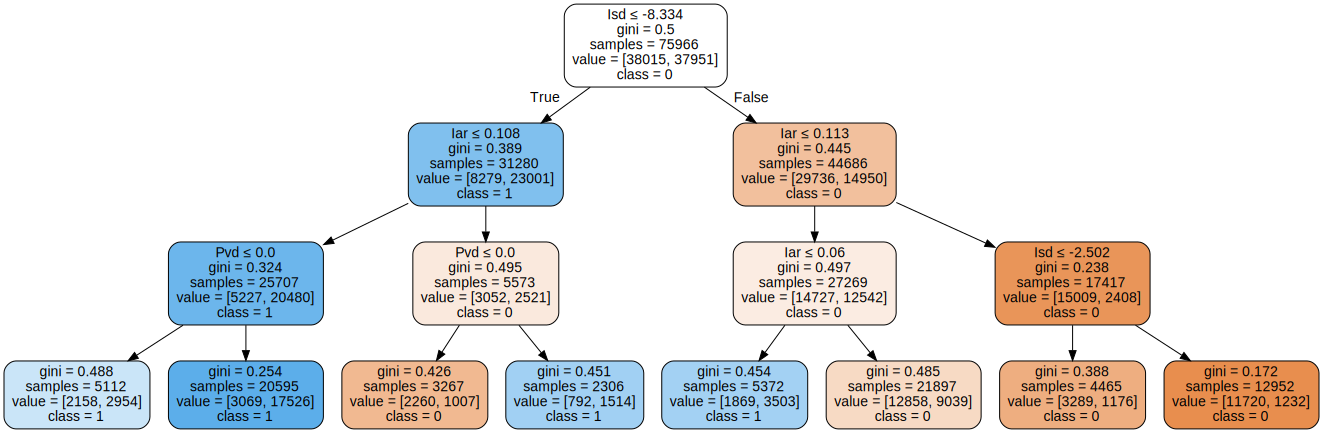

In [29]:
dot_data = tree.export_graphviz(model1, out_file=None, 
                     feature_names=['负载率','Isa','三相电流不平衡度','Isd','Iar','Pvd','负载率差值'],  
                     class_names=['0','1'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph